# Plots for Hydrogen Mass function for all redshifts

snaps:  [100 115 134 158 173 192 216 250]
redshifts:  [4.9999988  4.01575197 2.99733298 2.00100053 1.50871276 0.99933302
 0.50100094 0.        ]
light travel time:  [12231.24679633 11881.54868823 11283.32371736 10185.99335738
  9241.64988071  7682.30347798  5035.97124274     0.        ]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarni

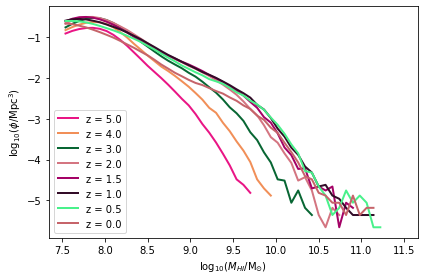

In [1]:
from Functions import *

fname_in = "imapping_testrun/meraxes.hdf5" # Get the file name for the meraxes file we are using
h = meraxes.set_little_h(0.7)# By specifying Hubble parameter: h=0.7, we are ensuring that all of the galaxy properties

# Read in all the snap shots using the function 'read snaplist'. Little h previously set as 0.7
snaplist = meraxes.io.read_snaplist(fname_in, h)
snaps = snaplist[0]
redshifts=snaplist[1]
lt_times=snaplist[2]
# Print the values if you want to see
print ('snaps: ', snaps)
print('redshifts: ', redshifts)
print('light travel time: ', lt_times)

# Create a new figure (with 1 column and 1 row) and axis
fig, ax = plt.subplots(1, 1)
#plt.title("Hydrogen Mass Function for all Snap Shots")

# for each snapshot...
for i in snaps:

    # Get the galaxy catalgoue and simulation properties from meraxes function 'read_gals'
    gals, sim_props = meraxes.read_gals(fname_in, i, sim_props=True) #read in galaxies
    
    #  convert units to log10(M/Msol).
    gals["HIMass"] = np.log10(gals["HIMass"]*1e10)
    
    # Calculate the HMIF
    himf = calc_mass_function(gals["HIMass"], sim_props["Volume"], bins=50,
                             range=(7.5, 11.5))

    # Plot the HI mass function
    snaplist_index_used = list(snaplist[0]).index(i)# convert to list and find the index of the snap we are using
    redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
    redshift_used = round(redshift_used, 1) # round float to nearest whole int
    redshift_used =  str(redshift_used) # round float to nearest whole int
    
    x = himf[:,0] # HI MASS
    y = np.log10(himf[:,1]) # HIMF
    ax.plot(x, y, color=np.random.rand(3,), lw=2, label=("z = " + redshift_used))

    # Set the axis labels.
    # Note the use of LaTeX here.
    ax.set_xlabel(r"$\log_{10}(M_{HI} / {\rm M_{\odot}})$")
    ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^3})$")

    # Add the legend
    ax.legend(loc="lower left")
    # Finally save the figure as a PDF
    plt.tight_layout()
    
name_of_plot=("HIMF_allz")
plt.savefig("final_plots/HIMF/" + name_of_plot + ".pdf")

